In [1]:
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|
#                     |              |              |              |
#                     /              /              /              /
#                     \              \              \              /
#                     /              /              /              /
#                     |              |              |              |
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

#                 |----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----o
#                 |              |              |              |
#                 /              /              /              /
#                 \              \              \              \
#                 /              /              /              /
#                 |              |              |              |
#  o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

In [2]:
import numpy as np  #Importing NumPy
import math
import matplotlib.pyplot as plt
import random
from ipynb.fs.defs.FrictionFactors import * #Imports all the functions

In [3]:
import platform
is_windows = any(platform.win32_ver())
if is_windows==True:
    path=r'C:\Users\prana\Google Drive (u1011561@gcloud.utah.edu)\PhD\Geothermal\AnalyticalModel\Images'
else:
    path=r'/Users/asai/Google Drive (u1011561@gcloud.utah.edu)/PhD/Geothermal/AnalyticalModel/Images/'

In [4]:
#For Fracture
NumberOfFractures=10
TotalWellLength=1000 #m, Length of the well
BasePermeability=1e-12 #m2, #Fracture base Permebility
FractureHeight=100 #m Fracture entrance length
FractureWidth=5.0 #m Fracture entrance pseudo width
BaseFractureLength=100 #m Height of fractures
Area_FractureEntrance=FractureHeight*FractureWidth #Area of fracture for the fluid to enter

#For Pipe
Diameter_InjectionWell=0.1524#*(0.5/0.1524)   #m Diameter of the Injection Pipe
Diameter_ProductionWell=0.1524#*(0.5/0.1524)  #m Diameter of the Production Pipe
Area_InjectionWell=math.pi*Diameter_InjectionWell**2*0.25 #meters sq.
Area_ProductionWell=math.pi*Diameter_InjectionWell**2*0.25 #meters sq.
DensityWater=1000 #kg/s
e=0.015/1000  #roughness in m
BaseInjectionWellSection=TotalWellLength/NumberOfFractures #m Length of Inj pipe section
BaseProductionWellSection=TotalWellLength/NumberOfFractures #m Length of Prod pipe section

#For Perforation
LengthOfPerfZone=1 #m, length og each perf zone
Cd=0.75 #Discharge Coefficient
NumberOfPerfPerMeter=10 # Number of perforations per meter
NumberOfPerfs=LengthOfPerfZone*NumberOfPerfPerMeter #Number of Perforations
BaseDiameter_InjectionPerforation=0.003175*3#*0.5 #m, Diameter of perforations
BaseDiameterProductionPerforation=0.003175*3#*0.5 #m, Diameter of perforations

In [5]:
#Initialization
Pressure_Injection=np.zeros(NumberOfFractures+1)
Pressure_Production=np.zeros(NumberOfFractures+1)
Pressure_Fracture=np.zeros(NumberOfFractures)
Flowrate_Fracture=np.zeros(NumberOfFractures)
FractureLength=np.zeros(NumberOfFractures)
InjectionWellSection=np.zeros(NumberOfFractures+1)
ProductionWellSection=np.zeros(NumberOfFractures+1)
Permeability_Fracture=np.zeros(NumberOfFractures)
Diameter_InjectionPerforation=np.zeros(NumberOfFractures)
Diameter_ProductionPerforation=np.zeros(NumberOfFractures)
WellAngle=0

In [6]:
#Flow Rate and Pressure
Flowrate_Initial=50 #kg/s
Pressure_Injection[0]=3e7

In [7]:
#CONTROL VARIABLES

#Turn on pressure drop in injection well
InjectionWellActivate=1 #if 1, the pressure drop in the well is on
#Turn on pressure drop in production well
ProductionWellActivate=1 #if 1, the pressure drop in the well is on
#Activate Perforation
ActivateInjectionPerforations=1  #If 0, perforation pressure drop is zero.
#activate production well perforation
ActivateProductionPerforations=1

#Variable Permeablity
# If 0, All fractures have same permeability
# If 1, The permeability values are assigned at random with respect to the base value
# If 2, Option to input custom permeability values.
VariablePermeability=0


#ORIENTATION OF WELLS
# If 1, The wells are Parallel
# If 2, The wells are Anti-Parallel
# If 3, The wells are Non-Parallel  # Input the Difference between first and last fracture
WellsOrientation=2

if WellsOrientation==3:
    d1=float(input("Enter the difference between the first and last fracture size: "))
    BaseFractureLength=BaseFractureLength-d1/2
    WellAngle=math.atan((d1/2)/((n-1)*BaseInjectionWellSection)) #Angle of Injection well
    print(math.degrees(WellAngle)*2)
for i in range(NumberOfFractures):
    Flowrate_Fracture[i]=Flowrate_Initial/NumberOfFractures
    FractureLength[i]=abs(BaseFractureLength+(NumberOfFractures-i-1)*math.tan(WellAngle)*BaseInjectionWellSection+(NumberOfFractures-i-1)*math.tan(WellAngle)*BaseProductionWellSection)
for i in range(NumberOfFractures+1):
    InjectionWellSection[i]=BaseInjectionWellSection/math.cos(WellAngle)
    ProductionWellSection[i]=BaseProductionWellSection/math.cos(WellAngle)

#Adaptive Perf Dia
pfdia=0 #If 0, Adaptive dia is off.

In [8]:
#Calculate Fracture Permeability
#Function is defined as:
# var1*BasePermeability*(10^var2), where Var1 varies from 1 to 10 and Var2 varies from -1, 0 or 1, at random.
if VariablePermeability!=2:
    Permeability_Fracture=FracturePermeability(NumberOfFractures,BasePermeability,FractureWidth,FractureHeight,VariablePermeability)
else:
    for i in range(NumberOfFractures):
        #Define any custom function
        if i%2==0:
            Permeability_Fracture[i]=BasePermeability/2
        else:
            Permeability_Fracture[i]=BasePermeability

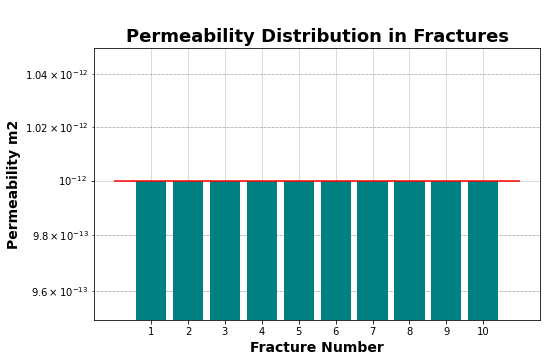

In [9]:
pplots(Permeability_Fracture,NumberOfFractures,"Permeability","yes",path)

In [10]:
#Calculate Perforations

#Calculating Geometric mean of fractures
GMean = math.prod(Permeability_Fracture)**(1/len(Permeability_Fracture))

for i in range(NumberOfFractures):
    if VariablePermeability==0:
        if pfdia==1:
            Diameter_InjectionPerforation[i]=((i+2)**0.2/n**0.04)*BaseDiameter_InjectionPerforation #The inittial term is penalty for location
            Diameter_ProductionPerforation[i]=((i+2)**0.2/n**0.04)*BaseDiameterProductionPerforation #The inittial term is penalty for location
        else:
            Diameter_InjectionPerforation[i]=BaseDiameter_InjectionPerforation
            Diameter_ProductionPerforation[i]=BaseDiameterProductionPerforation
    else:
        if pfdia==1:
            Diameter_InjectionPerforation[i]=BaseDiameter_InjectionPerforation*(1.3**(math.log(GMean/Permeability_Fracture[i],10)))
            Diameter_ProductionPerforation[i]=BaseDiameter_InjectionPerforation*(1.3**(math.log(GMean/Permeability_Fracture[i],10)))
        else:
            Diameter_InjectionPerforation[i]=BaseDiameter_InjectionPerforation
            Diameter_ProductionPerforation[i]=BaseDiameterProductionPerforation

In [11]:
if pfdia==5:
    Diameter_InjectionPerforation[0]=BaseDiameter_InjectionPerforation*0.9
    Diameter_InjectionPerforation[1]=BaseDiameter_InjectionPerforation*1.5
    Diameter_InjectionPerforation[2]=BaseDiameter_InjectionPerforation*0.7
    Diameter_InjectionPerforation[3]=BaseDiameter_InjectionPerforation*0.7
    Diameter_InjectionPerforation[4]=BaseDiameter_InjectionPerforation*0.7
    Diameter_InjectionPerforation[5]=BaseDiameter_InjectionPerforation*0.7
    Diameter_InjectionPerforation[6]=BaseDiameter_InjectionPerforation*0.7
    Diameter_InjectionPerforation[7]=BaseDiameter_InjectionPerforation*1.5
    Diameter_InjectionPerforation[8]=BaseDiameter_InjectionPerforation*1.5
    Diameter_InjectionPerforation[9]=BaseDiameter_InjectionPerforation*0.7
    for i in range(i):
        Diameter_ProductionPerforation[i]=Diameter_InjectionPerforation[i]

In [12]:
MaxIterations=1000 #number of iterations
#mmax=10000 #max number of iterations
Tolerance=1e-6 #Tolerance
Flowrate_Update=np.zeros(NumberOfFractures)
Flowrate_Frac1=np.zeros(MaxIterations)
Flowrate_Frac5=np.zeros(MaxIterations)

for j in range(MaxIterations):
    Flowrate_Cumulative=Flowrate_Initial/1000
    #pressure drop in injection well
    for i in range(NumberOfFractures):
        if InjectionWellActivate==0:
            Pressure_Injection[i+1]=Pressure_Injection[i]
        else:            
            Pressure_Injection[i+1]=Pressure_Injection[i]-Fhal(e,Diameter_InjectionWell,Rep(Flowrate_Cumulative,Diameter_InjectionWell))*2*InjectionWellSection[i+1]*DensityWater*(Flowrate_Cumulative/Area_InjectionWell)**2/Diameter_InjectionWell
        Flowrate_Cumulative=Flowrate_Cumulative-Flowrate_Fracture[i]/1000

    #Pressure drop in Production well
    Flowrate_Cumulative=Flowrate_Fracture[NumberOfFractures-1]/1000
    if WellsOrientation!=2:
        #pressure drops in last Fracture
        if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
            Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/1000,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/1000,Cd,NumberOfPerfs,Diameter_InjectionPerforation[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/1000,Cd,NumberOfPerfs,Diameter_ProductionPerforation[NumberOfFractures-1])
        elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
            Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/1000,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/1000,Cd,NumberOfPerfs,Diameter_ProductionPerforation[NumberOfFractures-1])
        elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
            Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/1000,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/1000,Cd,NumberOfPerfs,Diameter_InjectionPerforation[NumberOfFractures-1])
        elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations
            Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/1000,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])
    

        for i in range(NumberOfFractures,0,-1):
            #turning off production well pressure drop
            if ProductionWellActivate==0:
                Pressure_Production[i-1]=Pressure_Production[i]
            else:
                Pressure_Production[i-1]=Pressure_Production[i]-Fhal(e,Diameter_ProductionWell,Rep(Flowrate_Cumulative,Diameter_ProductionWell))*2*ProductionWellSection[i-1]*DensityWater*(Flowrate_Cumulative/Area_ProductionWell)**2/Diameter_ProductionWell
            Flowrate_Cumulative=Flowrate_Cumulative+Flowrate_Fracture[i-1]/1000
        #Flow Rate in all Fractures
        Flowrate_Reinitilized=0
        for i in range(NumberOfFractures):
            Pressure_Fracture[i]=Pressure_Injection[i+1]-Pressure_Production[i+1]
            if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                Flowrate_Fracture[i]=Q_all_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i],Diameter_ProductionPerforation[i])*1000
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                Flowrate_Fracture[i]=Q_Production_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_ProductionPerforation[i])*1000
            elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                Flowrate_Fracture[i]=Q_Injection_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i])*1000
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations            
                Flowrate_Fracture[i]=Q_No_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i])*1000
            
            Flowrate_Reinitilized=Flowrate_Reinitilized+Flowrate_Fracture[i]
    else:
        #pressure drops in First Fracture
        if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
            Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/1000,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/1000,Cd,NumberOfPerfs,Diameter_InjectionPerforation[0])-Pperf(Flowrate_Fracture[0]/1000,Cd,NumberOfPerfs,Diameter_ProductionPerforation[0])
        elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
            Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/1000,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/1000,Cd,NumberOfPerfs,Diameter_ProductionPerforation[0])
        elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations    
            Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/1000,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/1000,Cd,NumberOfPerfs,Diameter_InjectionPerforation[0])
        elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations    
            Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/1000,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])
        
        #Pressure drop in Production well
        Flowrate_ProductionReinitilized=0
        for i in range(NumberOfFractures):
            Flowrate_ProductionReinitilized=Flowrate_ProductionReinitilized+Flowrate_Fracture[i]/1000
            if ProductionWellActivate==0:
                Pressure_Production[i+1]=Pressure_Production[i]
            else:
                Pressure_Production[i+1]=Pressure_Production[i]-Fhal(e,Diameter_ProductionWell,Rep(Flowrate_ProductionReinitilized,Diameter_ProductionWell))*2*ProductionWellSection[i-1]*DensityWater*(Flowrate_ProductionReinitilized/Area_ProductionWell)**2/Diameter_ProductionWell
        
        #Flow Rate in all Fractures including perf
        Flowrate_Reinitilized=0
        for i in range(NumberOfFractures):
            Pressure_Fracture[i]=Pressure_Injection[i+1]-Pressure_Production[i]
            if Pressure_Fracture[i]>0:
                if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                    Flowrate_Fracture[i]=Q_all_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i],Diameter_ProductionPerforation[i])*1000
                elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                    Flowrate_Fracture[i]=Q_Production_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_ProductionPerforation[i])*1000
                elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                    Flowrate_Fracture[i]=Q_Injection_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i])*1000
                elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations            
                    Flowrate_Fracture[i]=Q_No_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i])*1000                

            else:
                Flowrate_Fracture[i]=0.01
            Flowrate_Reinitilized=Flowrate_Reinitilized+Flowrate_Fracture[i]
                
    Flowrate_Frac1[j]=Flowrate_Fracture[0]
    Flowrate_Frac5[j]=Flowrate_Fracture[5]
    #Calculating flowrate for next iteration
    for i in range(NumberOfFractures):
        Flowrate_Fracture[i]=(Flowrate_Initial)*Flowrate_Fracture[i]/Flowrate_Reinitilized
        
    Flowrate_Update=Flowrate_Update+np.array(Flowrate_Fracture)
    if j>50:
        Flowrate_Fracture=Flowrate_Update/j
print(MaxIterations)

1000


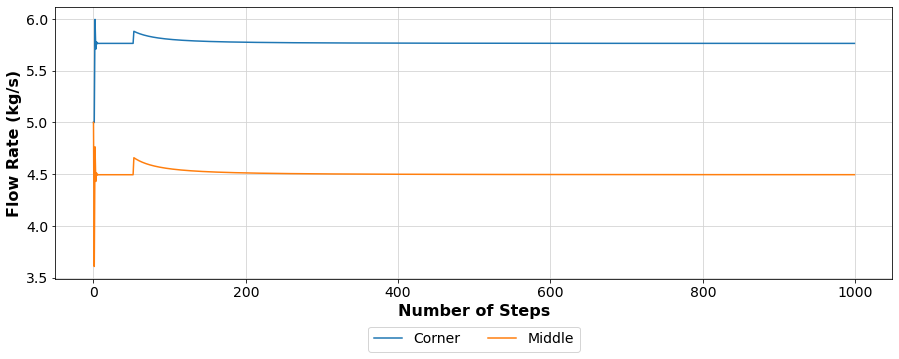

In [13]:
#Convergenge plot
a=Flowrate_Initial/NumberOfFractures
Flowrate_Frac1=np.insert(Flowrate_Frac1,0,a)
Flowrate_Frac5=np.insert(Flowrate_Frac5,0,a)
plt.figure(figsize = (15,5))
plt.plot(Flowrate_Frac1[0:MaxIterations])
plt.plot(Flowrate_Frac5[0:MaxIterations])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.autoscale() 
plt.legend(['Corner','Middle'],loc="upper center",ncol=5,bbox_to_anchor= (0.5, -0.15),prop={'size': 14},frameon=True)
plt.grid(which='major', axis='both',color='lightgrey',zorder=1)
plt.ylabel('Flow Rate (kg/s)', fontweight='bold',fontsize=16)
plt.xlabel('Number of Steps', fontweight='bold',fontsize=16)
plt.savefig(r'/Users/asai/Google Drive (u1011561@gcloud.utah.edu)/PhD/Research/Prospective Papers/3. Analytical Model for Fluid Flow Distribution in an Enhanced Geothermal Systems/Results/images/Convergence', bbox_inches='tight')
plt.show()

[11.515063040340198, 10.491952567508582, 9.734696846198098, 9.23564911270486, 8.9889359643455, 8.991471525451745, 9.243340757476256, 9.747793719992615, 10.510848271581864, 11.540248194400275]


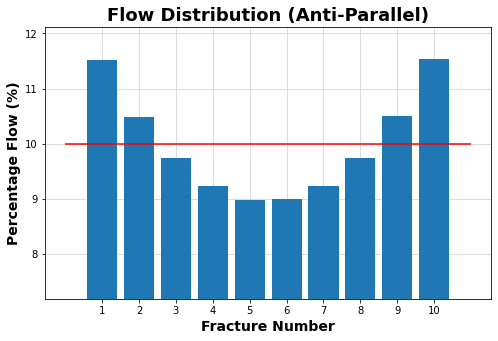

Friction Head= 189.08097018496684 m
Del P= 1.8529935078126751 MPa
Del P= 268.7544723861348 psi


In [14]:
#Flow Distribution
distpct=np.empty(NumberOfFractures)
temp=np.empty(NumberOfFractures)
plt.figure(figsize = (8,5))
# set width of bar
barWidth = 1*(NumberOfFractures-1)/(NumberOfFractures+1)

for i in range(NumberOfFractures):
    distpct[i]=100*(Flowrate_Fracture[i]/sum(Flowrate_Fracture))
x = np.linspace(1, NumberOfFractures, NumberOfFractures)
pmin=min(distpct)
pmax=max(distpct)
plt.ylim(ymin=pmin*0.8)
plt.ylim(ymax=pmax*1.05)
plt.hlines(100/NumberOfFractures, 0, NumberOfFractures+1, colors='r', linestyles='solid',zorder=3)              
plt.bar(x,distpct,width=barWidth,zorder=2)
# Add xticks on the middle of the group bars
plt.xticks(np.arange(1, NumberOfFractures+1, step=1))
plt.xlabel('Fracture Number', fontweight='bold',fontsize=14)
plt.ylabel('Percentage Flow (%)', fontweight='bold',fontsize=14)
if WellsOrientation==1:
    plt.title('Flow Distribution (Parallel)', fontweight='bold',fontsize=18)
elif WellsOrientation==2:
    plt.title('Flow Distribution (Anti-Parallel)', fontweight='bold',fontsize=18)
elif WellsOrientation==3:
    plt.title('Flow Distribution (Non-Parallel)', fontweight='bold',fontsize=18)
else:
    plt.title('\nFlow Distribution in Fractures', fontweight='bold',fontsize=18)
#plt.legend(loc="upper center",ncol=3,bbox_to_anchor= (0.5, -0.15),prop={'size': 12},frameon=True)
plt.grid(which='major', axis='both',color='lightgrey',zorder=1)
plt.savefig(r'%s/1.png' %path, bbox_inches='tight')
print(list(distpct))
plt.show()
#pplots(Pi,n,"Inlet","yes")
#pplots(Po,n,"Outlet","yes")
print("Friction Head= "+str((max(Pressure_Injection)-min(Pressure_Production))/(9.8*1000))+" m")
print("Del P= "+str((max(Pressure_Injection)-min(Pressure_Production))/1e6)+" MPa")
print("Del P= "+str(145.038*(max(Pressure_Injection)-min(Pressure_Production))/1e6)+" psi")